In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import cufflinks as cf

c:\Users\nikhi\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\__init__.py:16: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.



In [3]:
con = sqlite3.connect('amin.db')
df = pd.read_sql("select * from sales", con)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:,.0f}'.format)

### Data Cleaning

In [4]:
df.isnull().sum()

user_pseudo_id             0
event_date                 0
new_event_timestamp        0
city                       6
pincode                    0
subtotal                  26
item_name_0                0
item_name_1            22819
item_name_2            28258
item_name_3            29556
item_name_4            29924
quantity_0                49
quantity_1             22819
quantity_2             28254
quantity_3             29556
quantity_4             29924
item_variant_0           583
item_variant_1         22972
item_variant_2         28306
item_variant_3         29573
item_variant_4         29928
price_0                    6
price_1                22824
price_2                28262
price_3                29556
price_4                29923
source_name              146
source_medium             84
source_origin             86
rw                         0
dtype: int64

In [5]:
df["cleaned_city"] = df["city"].str.lower().str.strip()
df["cleaned_city"] = df["cleaned_city"].apply(lambda x: "bangalore" if pd.notna(x) and x.startswith("ben") else x)
df["cleaned_city"] = df["cleaned_city"].apply(lambda x: "bangalore" if pd.notna(x) and x.startswith("ban") else x)
df["cleaned_city"] = df["cleaned_city"].apply(lambda x: "bangalore" if pd.notna(x) and x.endswith(("lore", "luru")) else x)
df["cleaned_city"] = df["cleaned_city"].fillna("bangalore")
df["subtotal"] = df["subtotal"].fillna(df["subtotal"].mean())
df.drop(columns = ["city"], inplace = True)
df["event_date"] = pd.to_datetime(df["event_date"])

In [6]:
colums = ["item_name_0",                
"item_name_1",            
"item_name_2",            
"item_name_3",            
"item_name_4",           
"quantity_0",                
"quantity_1",             
"quantity_2",             
"quantity_3",
"quantity_4",            
"item_variant_0",          
"item_variant_1",         
"item_variant_2",         
"item_variant_3",         
"item_variant_4",         
"price_0",                    
"price_1",                
"price_2",                
"price_3",                
"price_4",                ]
for i in colums:
    df[i] = df[i].replace(["None", None, "NaN"], 0).fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30075 entries, 0 to 30074
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_pseudo_id       30075 non-null  object        
 1   event_date           30075 non-null  datetime64[ns]
 2   new_event_timestamp  30075 non-null  object        
 3   pincode              30075 non-null  int64         
 4   subtotal             30075 non-null  float64       
 5   item_name_0          30075 non-null  object        
 6   item_name_1          30075 non-null  object        
 7   item_name_2          30075 non-null  object        
 8   item_name_3          30075 non-null  object        
 9   item_name_4          30075 non-null  object        
 10  quantity_0           30075 non-null  float64       
 11  quantity_1           30075 non-null  float64       
 12  quantity_2           30075 non-null  float64       
 13  quantity_3           30075 non-

### Question and Answer

### Which Pincode Generates the Highest Sales ?

In [8]:
pin = df.groupby("pincode")["subtotal"].sum().reset_index().sort_values(by = "subtotal", ascending = False).nlargest(10, "subtotal")
pin["pincode"] = pin["pincode"].astype(str)
fig = px.bar(pin, x = "pincode", y = "subtotal", text = round(pin["subtotal"]/1000), labels = {"pincode":"Pincode", "subtotal": "Total Sales"},color = "subtotal", color_continuous_scale="GnBu")
fig.update_traces(
    marker_line_color = "black",
    marker_line_width = 1.5,
    texttemplate = "%{text}k",
    textposition = "outside"
)
fig.update_layout(
    height= 500,
    width = 800,
    annotations=[
        dict(
            text="Highest Sales By Pincode",
            x=0.5,
            y=1.17,
            xref="paper",
            yref="paper",
            font=dict(size=25, family="Arial", color="#C4AB41",weight = "bold"),
            showarrow=False,
            bgcolor="white",
            bordercolor="#91770A", 
            borderwidth=2,
            borderpad=14,
            width = 570,
            align = "left",
            
        )]
)
fig.show()


### Average Order value at different location

In [9]:
count_city = df["cleaned_city"].value_counts()[df["cleaned_city"].value_counts() > 9].index
newcity = df[df["cleaned_city"].isin(count_city)]
nc = newcity.groupby("cleaned_city")["subtotal"].mean().reset_index().sort_values(by = "subtotal", ascending = False)
fig = px.bar(nc, x="cleaned_city", y="subtotal",text = nc["subtotal"]/1000, labels = {"cleaned_city":"City","subtotal":"Average Order Value"}, color = "subtotal", color_continuous_scale= "Blues")
fig.update_traces(
    marker_line_color = "black",
    marker_line_width = 2,
    texttemplate = "%{text:.2f}k",
    textposition = "outside"
)
fig.update_layout(
    height= 500,
    width = 900,
    annotations=[
        dict(
            text="Average Order Value",
            x=0.5,
            y=1.17,
            xref="paper",
            yref="paper",
            font=dict(size=25, family="Arial", color="#C4AB41",weight = "bold"),
            showarrow=False,
            bgcolor="white",
            bordercolor="#91770A", 
            borderwidth=2,
            borderpad=14,
            width = 600,
            align = "left",
            
        )])
fig.show()

### What’s the trend in total orders and revenue over time (daily/weekly/monthly)?


In [10]:
df.head(1)

,user_pseudo_id,event_date,new_event_timestamp,pincode,subtotal,item_name_0,item_name_1,item_name_2,item_name_3,item_name_4,...,price_0,price_1,price_2,price_3,price_4,source_name,source_medium,source_origin,rw,cleaned_city
0,1834626185.1753107144,2025-07-21,2025-07-21 14:18:19.740850,560102,620,Almond And Milk Chocolate Brunette,0,0,0,0,...,620,0,0,0,0,DAM-Search-Branding-Bofu-Phrase_Broad_Exact_12...,cpc,google,1,bangalore


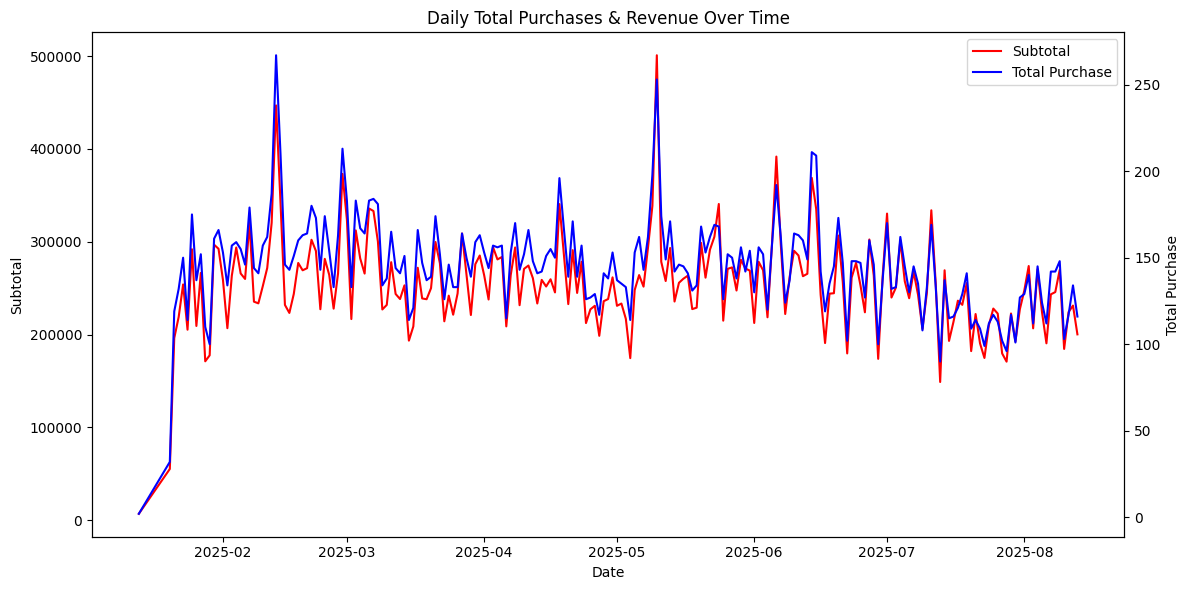

In [11]:
trends = df.groupby(df["event_date"].dt.date).agg({
    "user_pseudo_id": 'count',
    "subtotal": 'sum'
}).rename(columns = {"user_pseudo_id":"total_purchase"}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))
#first axis
ax1.plot(trends["event_date"], trends["subtotal"], color = "red", label = "Subtotal")
ax1.set_xlabel("Date")
ax1.set_ylabel("Subtotal")

ax2 = ax1.twinx()
ax2.plot(trends["event_date"], trends["total_purchase"], color = "blue", label = "Total Purchase")
ax2.set_ylabel("Total Purchase")
plt.title('Daily Total Purchases & Revenue Over Time')
lines1, labels1 = ax1.get_legend_handles_labels() 
lines2, labels2 = ax2.get_legend_handles_labels() 
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.tight_layout()
plt.show()

### Top seller product by Revenue and Quantity

In [12]:
id_vars = [
    "user_pseudo_id", "event_date", "new_event_timestamp", "pincode",
    "subtotal", "source_name", "source_medium", "source_origin",
    "rw", "cleaned_city"
]
item_name = df.melt(
    id_vars = id_vars,
    value_vars = ["item_name_0","item_name_1","item_name_2","item_name_3","item_name_4"],
    value_name = "Product_name",
    var_name = "in"
)
item_price = df.melt(
    id_vars= id_vars,
    value_vars = ["price_0","price_1","price_2","price_3","price_4"],
    value_name = "Price",
    var_name = "ip"
)
item_quantity = df.melt(
    id_vars = id_vars,
    value_vars = ["quantity_0","quantity_1","quantity_2","quantity_3","quantity_4"],
    value_name = "Quantity",
    var_name = "iq"

)
item_variant = df.melt(
    id_vars = id_vars,
    value_vars = ["item_variant_0","item_variant_1","item_variant_2","item_variant_3","item_variant_4"],
    value_name = "Item_variant",
    var_name = "iv"

)

item_name["product_no"]    = item_name["in"].str.extract("(\d+)")
item_price["product_no"]   = item_price["ip"].str.extract("(\d+)")
item_quantity["product_no"]= item_quantity["iq"].str.extract("(\d+)")
item_variant["product_no"] = item_variant["iv"].str.extract("(\d+)")


item_name    = item_name.drop(columns=["in"])
item_price   = item_price.drop(columns=["ip"])
item_quantity= item_quantity.drop(columns=["iq"])
item_variant = item_variant.drop(columns=["iv"])


merged = (
    item_name
    .merge(item_price, on=id_vars + ["product_no"])
    .merge(item_quantity, on=id_vars + ["product_no"])
    .merge(item_variant, on=id_vars + ["product_no"])
)

  
merged["Revenue"] = merged["Price"] * merged["Quantity"]


<>:33: SyntaxWarning:

invalid escape sequence '\d'

<>:34: SyntaxWarning:

invalid escape sequence '\d'

<>:35: SyntaxWarning:

invalid escape sequence '\d'

<>:36: SyntaxWarning:

invalid escape sequence '\d'

<>:33: SyntaxWarning:

invalid escape sequence '\d'

<>:34: SyntaxWarning:

invalid escape sequence '\d'

<>:35: SyntaxWarning:

invalid escape sequence '\d'

<>:36: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\nikhi\AppData\Local\Temp\ipykernel_12872\132635173.py:33: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\nikhi\AppData\Local\Temp\ipykernel_12872\132635173.py:34: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\nikhi\AppData\Local\Temp\ipykernel_12872\132635173.py:35: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\nikhi\AppData\Local\Temp\ipykernel_12872\132635173.py:36: SyntaxWarning:

invalid escape sequence '\d'



In [13]:
# Prouduct by Revenue and Quantity
ndf = merged.copy()
ndf = ndf.drop(columns = "product_no")
ndf = ndf.dropna(subset=["Product_name"])
productrevenue = ndf.groupby("Product_name").agg(
    {
        'Revenue': 'sum',
        'Quantity': 'sum'
    }
).reset_index().sort_values(by = 'Revenue', ascending = False)
pr = productrevenue.melt(
    id_vars = "Product_name",
    value_vars = ["Revenue", "Quantity"],
    var_name = "Metric",
    value_name = "Value"
)
fig = px.bar(pr, x = "Product_name", y="Value", color = "Metric", barmode = "group", title = "Product by Sales and Quantity")
fig.update_xaxes(
    range = [-0.5,10],
    tickfont = dict(color="black")
)
fig.show()

### Which marketing source drives the highest revenue?

In [23]:
marketingsource = df.groupby("source_origin")["subtotal"].sum().reset_index().sort_values(by = "subtotal", ascending = False)
fig = px.bar(marketingsource, x = "source_origin", y = "subtotal", color = "source_origin", title = "Marketing source vs Revenue")
fig.show()

In [21]:
df.sample(1)

,user_pseudo_id,event_date,new_event_timestamp,pincode,subtotal,item_name_0,item_name_1,item_name_2,item_name_3,item_name_4,...,price_0,price_1,price_2,price_3,price_4,source_name,source_medium,source_origin,rw,cleaned_city
22961,1410604358.1742804343,2025-03-24,2025-03-24 08:29:07.121660,560098,"2,180","Pineapple, Lychee and Cherry Cake",0,0,0,0,...,"2,180",0,0,0,0,(direct),(none),(direct),1,bangalore
